In [2]:
import tensorflow
from tensorflow import keras
from keras.datasets import mnist
from keras import Sequential
from keras.layers import Conv2D,MaxPooling2D,Dense,Flatten,Dropout
import matplotlib.pyplot as plt
import cv2
import numpy as np


In [3]:
(x_train, y_train),(x_test,y_test)=mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [4]:
x_train=x_train.astype('float32')/255.0
x_test=x_test.astype('float32')/255.0

In [5]:
model=Sequential()

model.add(Conv2D(32,kernel_size=(3*3),padding='valid',activation='relu',input_shape=(28,28,1)))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))
model.add(Conv2D(64,kernel_size=(3*3),padding='valid',activation='relu',input_shape=(28,28,1)))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())
Dropout(0.1)

model.add(Dense(128,activation='relu'))
model.add(Dense(10,activation='softmax'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [6]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 20, 20, 32)     │         2,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 10, 10, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 2, 2, 64)       │       165,952 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 1, 1, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 178,186 (696.04 KB)

 Trainable params: 178,186 (696.04 KB)

 Non-trainable params: 0 (0.00 B)

In [7]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
hist=model.fit(x_train,y_train,epochs=15,batch_size=64,validation_data=(x_test,y_test))

Epoch 1/15
938/938 ━━━━━━━━━━━━━━━━━━━━ 12s 9ms/step - accuracy: 0.8695 - loss: 0.4225 - val_accuracy: 0.9804 - val_loss: 0.0650
Epoch 2/15
938/938 ━━━━━━━━━━━━━━━━━━━━ 14s 4ms/step - accuracy: 0.9816 - loss: 0.0587 - val_accuracy: 0.9854 - val_loss: 0.0447
Epoch 3/15
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9887 - loss: 0.0379 - val_accuracy: 0.9877 - val_loss: 0.0411
Epoch 4/15
938/938 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9910 - loss: 0.0279 - val_accuracy: 0.9873 - val_loss: 0.0385
Epoch 5/15
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9933 - loss: 0.0211 - val_accuracy: 0.9904 - val_loss: 0.0297
Epoch 6/15
938/938 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9949 - loss: 0.0157 - val_accuracy: 0.9901 - val_loss: 0.0312
Epoch 7/15
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9956 - loss: 0.0142 - val_accuracy: 0.9882 - val_loss: 0.0396
Epoch 8/15
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.9961 - loss: 0.0116 - val_accuracy: 

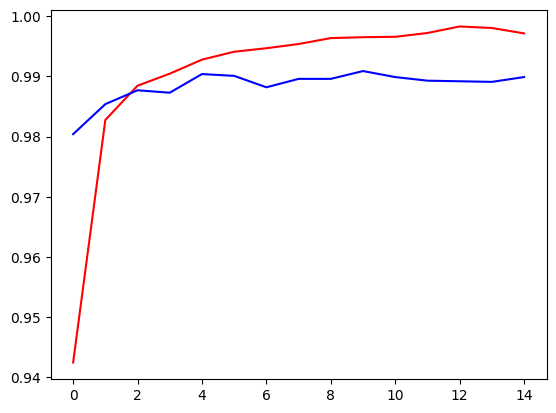

In [8]:
plt.plot(hist.history['accuracy'],label='train',color='red')
plt.plot(hist.history['val_accuracy'],label='validation',color='blue')

In [11]:
test_img=cv2.imread('/content/test.jpeg')
test_img.shape

(144, 225, 3)

In [12]:
test_img=cv2.cvtColor(test_img, cv2.COLOR_BGR2GRAY)
test_img=cv2.resize(test_img,(28,28))
test_input=test_img.reshape((1,28,28,1))

In [13]:
prediction=model.predict(test_input)
predicted_class=np.argmax(prediction)
print("Predicted Digit:", predicted_class)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 400ms/step
Predicted Digit: 6


In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [14]:
!git config --global user.email "tupur.das2003@gmail.com"
!git config --global user.name "Dibyangana Das"


In [18]:
!git clone https://github.com/tupur-29/Handwritten-Digit-Recognizer.git


Cloning into 'Handwritten-Digit-Recognizer'...
fatal: could not read Username for 'https://github.com': No such device or address


In [22]:
!mkdir -p /content/Handwritten-Digit-Recognizer


In [24]:
!cp /content/Handwritten-Digit-Recognizer.ipynb /content/Handwritten-Digit-Recognizer/


cp: cannot stat '/content/Handwritten-Digit-Recognizer.ipynb': No such file or directory
